# Text Retrieval

- Step 1: Convert texts to vectors (Text Embedding)
- Step 2: Measure similarity

In [1]:
import numpy as np
import re
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

## 1 Text Embedding

### 1.1 BOW
It’s a collection of words to represent a sentence with word count and mostly disregarding the order in which they appear.

In [2]:
def clean_text(sentence):
    return re.sub("[^\w]", " ",  sentence.strip().lower()).split()


def tokenize(sentences):
    words = []
    for sentence in sentences:
        w = clean_text(sentence)
        words.extend(w)

    words = sorted(list(set(words)))
    return words


corpus = [
    'Tôi đi học',
    'Hôm nay, tôi đi học và tôi thấy rất vui',
    'Shopee sàn thương mại điện tử rất lớn việt nam',
    'Shopee và Lazada là hai người bạn thân',
    'con bò đực ăn cỏ',
    'con bò cái ăn cỏ và uống nước',
]

In [3]:
clean_text(corpus[0])

['tôi', 'đi', 'học']

In [4]:
vocab = tokenize(corpus)
print(f"Vocabulary Tokenize: \n{vocab} \n")

for sentence in corpus:
    words = clean_text(sentence)
    bag_vector = np.zeros(len(vocab)) # init with all zeros
    for w in words:
        for i, word in enumerate(vocab):
            if word == w:
                bag_vector[i] += 1
                print(bag_vector, word)

    print(f"\n{sentence} \n{bag_vector}\n")

Vocabulary Tokenize: 
['bò', 'bạn', 'con', 'cái', 'cỏ', 'hai', 'hôm', 'học', 'lazada', 'là', 'lớn', 'mại', 'nam', 'nay', 'người', 'nước', 'rất', 'shopee', 'sàn', 'thân', 'thương', 'thấy', 'tôi', 'tử', 'uống', 'việt', 'vui', 'và', 'ăn', 'đi', 'điện', 'đực'] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] tôi
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0.] đi
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0.] học

Tôi đi học 
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0.]

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] hôm
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] nay
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] tôi
[0. 0. 0. 0

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 2 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0]]


**Limitations of BOW**
- Semantic meaning: the basic BOW approach does not consider the meaning of the word in the document
- Vector size: For a large document, the vector size can be huge resulting in a lot of computation and time

Text(0.5, 1.0, 'Cosine Similarity by BOW')

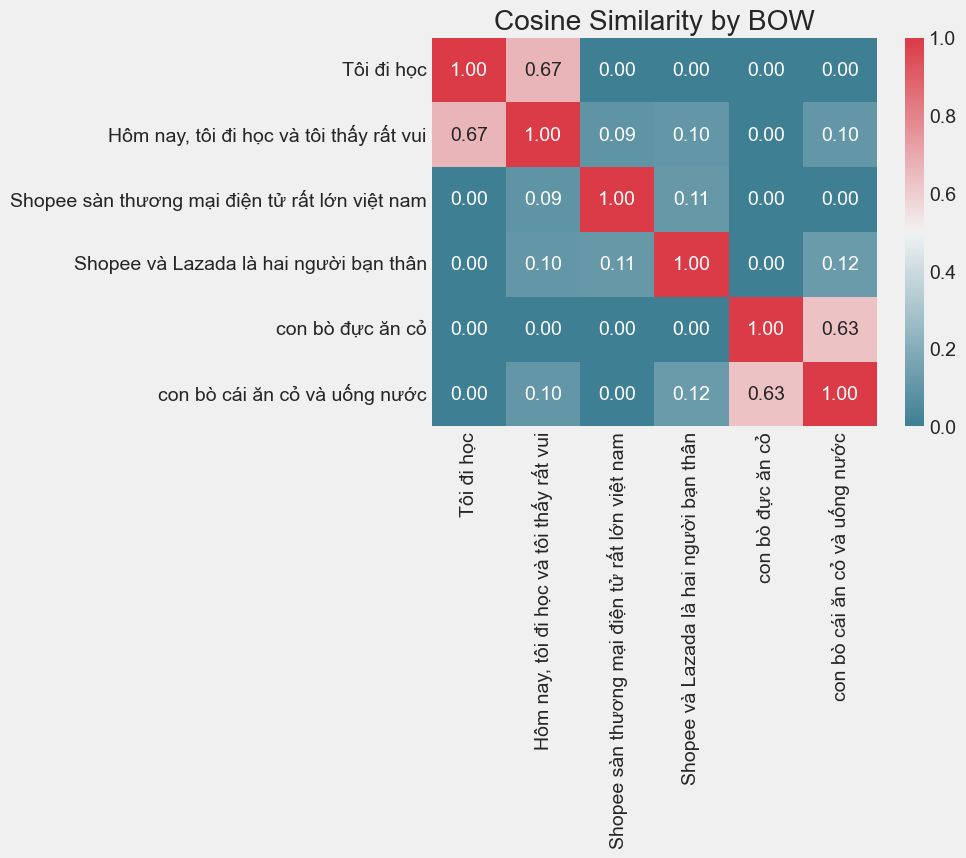

In [6]:
similarity_matrix = cosine_similarity(X)
similarity_df = pd.DataFrame(similarity_matrix, columns=corpus, index=corpus)

ax = sns.heatmap(similarity_df, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt=".2f")
ax.set_title('Cosine Similarity by BOW')

### 1.2 TF-IDF

/Users/kevin/.conda/envs/hihi/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Text(0.5, 1.0, 'Cosine Similarity by TF-IDF')

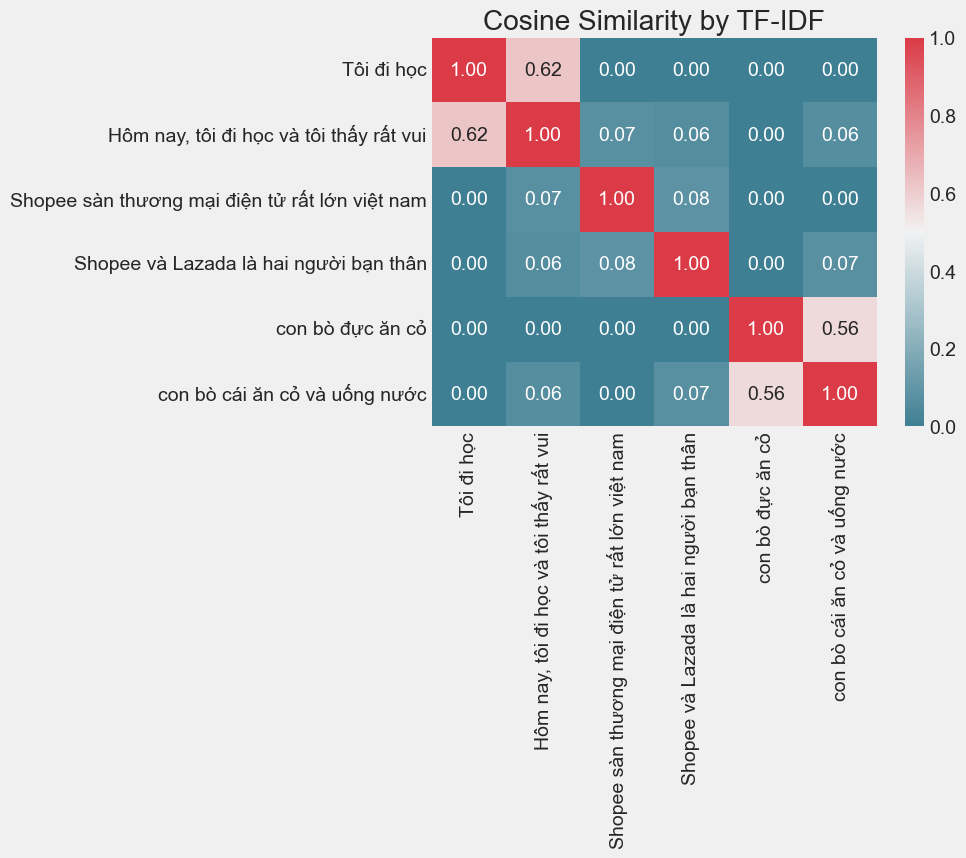

In [7]:
vectorizer = TfidfVectorizer()
maxtrix_base = vectorizer.fit_transform(corpus)

similarity_matrix_tfidf = cosine_similarity(maxtrix_base.todense())
similarity_df_tfidf = pd.DataFrame(similarity_matrix_tfidf, columns=corpus, index=corpus)
ax = sns.heatmap(similarity_df_tfidf, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt=".2f")
ax.set_title('Cosine Similarity by TF-IDF')